In [2]:
import xarray as xr

In [5]:
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            'u_component_of_wind', 'v_component_of_wind',
        ],
        'pressure_level': '1000',
        'year': [
            '2015',
            '2016', '2017', '2018',
            '2019', '2020',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            -22.75, -42.25, -23,
            -42,
        ],
    },
    'download.nc')

2020-05-21 20:11:15,694 INFO Welcome to the CDS
2020-05-21 20:11:15,696 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2020-05-21 20:11:17,233 INFO Request is queued
2020-05-21 20:11:20,158 INFO Request is running
2020-05-21 21:32:13,159 INFO Request is completed
2020-05-21 21:32:13,161 INFO Downloading http://136.156.132.236/cache-compute-0007/cache/data8/adaptor.mars.internal-1590102675.6813922-19627-31-8bcd6313-18ff-44b9-8cd5-440952ecdfd7.nc to download.nc (1.6M)
2020-05-21 21:32:15,831 INFO Download rate 621.5K/s                            


Result(content_length=1697484,content_type=application/x-netcdf,location=http://136.156.132.236/cache-compute-0007/cache/data8/adaptor.mars.internal-1590102675.6813922-19627-31-8bcd6313-18ff-44b9-8cd5-440952ecdfd7.nc)

In [3]:
dados1 = xr.open_dataset('D:/_Gabriel/Estudo/UFF/Bloqueios_Atmosfericos/nc/arubinha-pero.nc')

In [4]:
dados1

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 2, longitude: 2, time: 47110)
Coordinates:
  * longitude  (longitude) float32 -42.25 -42.0
  * latitude   (latitude) float32 -22.75 -23.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2015-01-01 ... 2020-05-16T21:00:00
Data variables:
    u          (time, expver, latitude, longitude) float32 ...
    v          (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-22 00:31:05 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [11]:
dados1.u

<xarray.DataArray 'u' (time: 47110, expver: 2, latitude: 2, longitude: 2)>
[376880 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -42.25 -42.0
  * latitude   (latitude) float32 -22.75 -23.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2015-01-01 ... 2020-05-16T21:00:00
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

In [12]:
datau = dados1.u[:,0,:,:]
datav = dados1.v[:,0,:,:]

In [13]:
magnitude = ((datau)** 2 + (datav)** 2) ** 0.5

In [14]:
mag = magnitude.groupby('time.hour').mean()

In [15]:
mag

<xarray.DataArray (hour: 24, latitude: 2, longitude: 2)>
array([[[5.51949  , 7.470928 ],
        [7.777726 , 8.510836 ]],

       [[5.4763994, 7.3937936],
        [7.768843 , 8.48692  ]],

       [[5.372726 , 7.2727246],
        [7.6637816, 8.402834 ]],

       [[5.2009664, 7.1058373],
        [7.4853506, 8.265155 ]],

       [[5.012063 , 6.9107776],
        [7.272304 , 8.089743 ]],

       [[4.8117914, 6.708102 ],
        [7.0416594, 7.9003124]],

       [[4.6651015, 6.5663896],
        [6.867277 , 7.763543 ]],

       [[4.5793786, 6.483337 ],
        [6.752333 , 7.673967 ]],

       [[4.5276012, 6.4544344],
        [6.6808987, 7.6393104]],

       [[4.4683084, 6.4179316],
        [6.599524 , 7.5997343]],

       [[3.994247 , 5.915312 ],
        [6.0457664, 7.169576 ]],

       [[3.810463 , 5.690989 ],
        [5.833885 , 7.013089 ]],

       [[3.7402825, 5.565194 ],
        [5.6785865, 6.8731594]],

       [[3.8349376, 5.557163 ],
        [5.653934 , 6.7964635]],

       [[3.996817 , 5.6181707],
        [5.722295 , 6.763557 ]],

       [[4.217626 , 5.7770047],
        [5.90885  , 6.8176847]],

       [[4.5090375, 6.054819 ],
        [6.218211 , 7.0214443]],

       [[4.865487 , 6.4659147],
        [6.639914 , 7.3685665]],

       [[5.2043424, 6.8815403],
        [7.0677066, 7.7566724]],

       [[5.454582 , 7.2312098],
        [7.455902 , 8.133174 ]],

       [[5.6084657, 7.4901595],
        [7.7392693, 8.414158 ]],

       [[5.6919813, 7.6511006],
        [7.901651 , 8.579262 ]],

       [[5.4377074, 7.4566164],
        [7.659325 , 8.415953 ]],

       [[5.485611 , 7.4835005],
        [7.708142 , 8.469995 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -42.25 -42.0
  * latitude   (latitude) float32 -22.75 -23.0
    expver     int32 1
  * hour       (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23

In [16]:
mag.isel(latitude=0).isel(longitude=0)

<xarray.DataArray (hour: 24)>
array([5.51949  , 5.4763994, 5.372726 , 5.2009664, 5.012063 , 4.8117914,
       4.6651015, 4.5793786, 4.5276012, 4.4683084, 3.994247 , 3.810463 ,
       3.7402825, 3.8349376, 3.996817 , 4.217626 , 4.5090375, 4.865487 ,
       5.2043424, 5.454582 , 5.6084657, 5.6919813, 5.4377074, 5.485611 ],
      dtype=float32)
Coordinates:
    longitude  float32 -42.25
    latitude   float32 -22.75
    expver     int32 1
  * hour       (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23

In [17]:
import seaborn as sns

In [18]:
magPos1 = mag.isel(latitude=0).isel(longitude=0)

In [19]:
magPos1.hour

<xarray.DataArray 'hour' (hour: 24)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23], dtype=int64)
Coordinates:
    longitude  float32 -42.25
    latitude   float32 -22.75
    expver     int32 1
  * hour       (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23

In [20]:
magPos1.values

array([5.51949  , 5.4763994, 5.372726 , 5.2009664, 5.012063 , 4.8117914,
       4.6651015, 4.5793786, 4.5276012, 4.4683084, 3.994247 , 3.810463 ,
       3.7402825, 3.8349376, 3.996817 , 4.217626 , 4.5090375, 4.865487 ,
       5.2043424, 5.454582 , 5.6084657, 5.6919813, 5.4377074, 5.485611 ],
      dtype=float32)

In [21]:
import matplotlib.pyplot as plt

In [121]:
magPos1['hour'].values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [126]:
magPos1.values * 1.944

array([10.729888 , 10.64612  , 10.444579 , 10.110679 ,  9.74345  ,
        9.354122 ,  9.068957 ,  8.902312 ,  8.801657 ,  8.686392 ,
        7.7648163,  7.40754  ,  7.271109 ,  7.4551187,  7.7698126,
        8.199065 ,  8.765569 ,  9.458507 , 10.117242 , 10.603708 ,
       10.902857 , 11.065211 , 10.570903 , 10.664028 ], dtype=float32)

Text(0, 0.5, 'Magnitude do Vento em Nós')

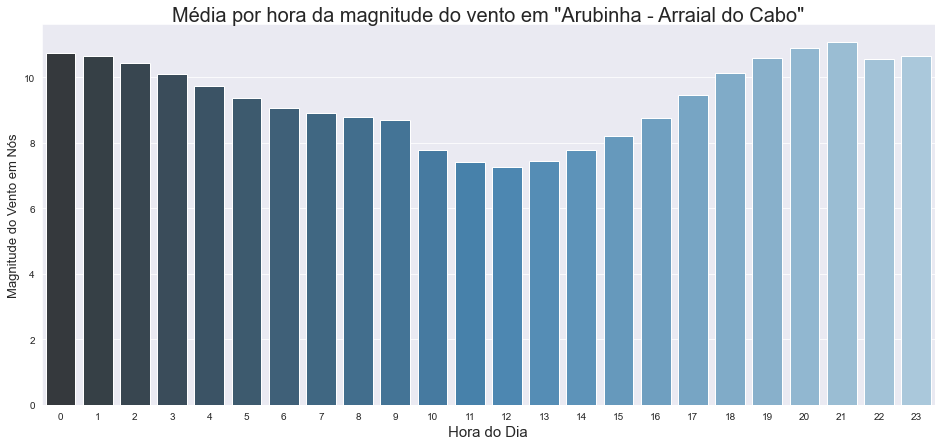

In [127]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,7))

sns.set_style('darkgrid')
sns.barplot(x = magPos1['hour'].values, y = magPos1.values * 1.944, orient='v', palette = 'Blues_d')

ax.set_title('Média por hora da magnitude do vento em "Arubinha - Arraial do Cabo"', size = 20, pad = 3)
ax.set_xlabel('Hora do Dia', fontdict={'fontsize': 15})
ax.set_ylabel('Magnitude do Vento em Nós', fontdict={'fontsize': 13})

Transformando em dataFrame

In [4]:
import pandas as pd

In [33]:
df = pd.DataFrame(magPos1)
df

,0
0,5.519490
1,5.476399
2,5.372726
3,5.200966
4,5.012063
5,4.811791
6,4.665102
7,4.579379
8,4.527601
9,4.468308


In [44]:
df['Hora do Dia']=df.index
df.set_index('Hora do Dia', inplace= True)

In [45]:
df['m/s'] = df[0]

In [47]:
df.drop(0,axis=1,inplace=True)
df['nós'] = df['m/s'].apply(nos)

In [48]:
df

,m/s,nós
Hora do Dia,,
0,5.519490,10.729888
1,5.476399,10.646120
2,5.372726,10.444579
3,5.200966,10.110679
4,5.012063,9.743451
5,4.811791,9.354123
6,4.665102,9.068957
7,4.579379,8.902312
8,4.527601,8.801657


In [38]:
def nos(x):
    valor = x * 1.944
    return valor

Text(0, 0.5, 'Magnitude do Vento em Nós')

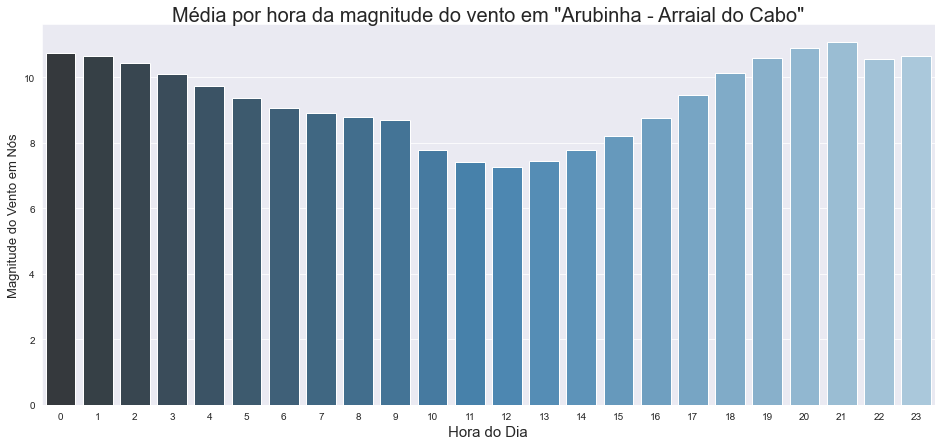

In [50]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,7))

sns.set_style('darkgrid')
sns.barplot(x = df.index, y = df['nós'], data = df, orient='v', palette = 'Blues_d')

ax.set_title('Média por hora da magnitude do vento em "Arubinha - Arraial do Cabo"', size = 20, pad = 3)
ax.set_xlabel('Hora do Dia', fontdict={'fontsize': 15})
ax.set_ylabel('Magnitude do Vento em Nós', fontdict={'fontsize': 13})
#plt.savefig()

## Analisando apenas dias de vento > 12 nós

12 nós = 6,17333 m/s

In [51]:
dados1

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 2, longitude: 2, time: 47110)
Coordinates:
  * longitude  (longitude) float32 -42.25 -42.0
  * latitude   (latitude) float32 -22.75 -23.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2015-01-01 ... 2020-05-16T21:00:00
Data variables:
    u          (time, expver, latitude, longitude) float32 ...
    v          (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-22 00:31:05 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [59]:
nulos = magnitude.isel(latitude=0).isel(longitude=0).isnull()

In [78]:
mag = magnitude.isel(latitude=0).isel(longitude=0).sel(time=slice('2015-01-01T00:00:00.000000000','2020-02-29T23:00:00.000000000'))

In [108]:
mag

<xarray.DataArray (time: 45264)>
array([2.1755707, 2.1447227, 3.9453726, ..., 4.844258 , 6.1447477,
       7.077549 ], dtype=float32)
Coordinates:
    longitude  float32 -42.25
    latitude   float32 -22.75
    expver     int32 1
  * time       (time) datetime64[ns] 2015-01-01 ... 2020-02-29T23:00:00

In [115]:
altos = mag.where(mag.values >= 6)
altosdrop = altos.dropna('time')
altosdrop

<xarray.DataArray (time: 14348)>
array([6.2677836, 6.5064287, 6.115418 , ..., 6.155955 , 6.1447477,
       7.077549 ], dtype=float32)
Coordinates:
    longitude  float32 -42.25
    latitude   float32 -22.75
    expver     int32 1
  * time       (time) datetime64[ns] 2015-01-03T14:00:00 ... 2020-02-29T23:00:00

In [116]:
magHigh1 = altosdrop.groupby('time.hour').mean()
magHigh1

<xarray.DataArray (hour: 24)>
array([8.290014 , 8.18871  , 8.084049 , 7.901121 , 7.7850747, 7.657802 ,
       7.543484 , 7.5119004, 7.539705 , 7.5163617, 7.418146 , 7.380118 ,
       7.4233575, 7.504287 , 7.5788875, 7.6030946, 7.582851 , 7.6754403,
       7.8844786, 8.050962 , 8.208737 , 8.3682375, 8.259965 , 8.289775 ],
      dtype=float32)
Coordinates:
    longitude  float32 -42.25
    latitude   float32 -22.75
    expver     int32 1
  * hour       (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23

Text(0, 0.5, 'Magnitude do Vento em Nós')

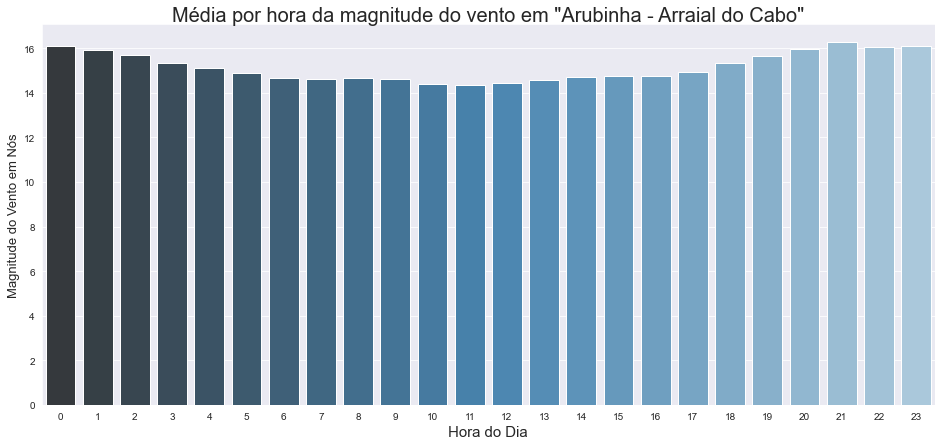

In [128]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,7))

sns.set_style('darkgrid')
sns.barplot(x = magHigh1['hour'].values, y = magHigh1.values * 1.944, orient='v', palette = 'Blues_d')

ax.set_title('Média por hora da magnitude do vento em "Arubinha - Arraial do Cabo"', size = 20, pad = 3)
ax.set_xlabel('Hora do Dia', fontdict={'fontsize': 15})
ax.set_ylabel('Magnitude do Vento em Nós', fontdict={'fontsize': 13})

# SEMANAS TOP

In [144]:
mag

<xarray.DataArray (time: 45264)>
array([2.1755707, 2.1447227, 3.9453726, ..., 4.844258 , 6.1447477,
       7.077549 ], dtype=float32)
Coordinates:
    longitude  float32 -42.25
    latitude   float32 -22.75
    expver     int32 1
  * time       (time) datetime64[ns] 2015-01-01 ... 2020-02-29T23:00:00

In [139]:
semana = mag.groupby('time.week').mean()
semana

<xarray.DataArray (week: 53)>
array([3.5496726, 4.517963 , 4.5814166, 4.4875855, 4.161084 , 3.7466545,
       4.4354186, 4.258082 , 3.2342312, 4.231139 , 3.2165966, 3.6710076,
       4.166665 , 3.088372 , 4.155489 , 4.799476 , 4.6339345, 4.306747 ,
       4.180168 , 4.771228 , 4.65634  , 3.4308512, 4.7054515, 4.2801304,
       4.532433 , 5.05487  , 5.38466  , 5.131579 , 5.9067225, 6.02288  ,
       5.143634 , 5.861201 , 5.892191 , 6.74975  , 6.229808 , 5.908243 ,
       6.664981 , 6.0033073, 5.3615303, 5.6454062, 6.24245  , 5.768571 ,
       5.140409 , 6.037902 , 5.032158 , 5.3717484, 4.8534284, 4.4572597,
       4.4496217, 4.447278 , 4.6692166, 4.29125  , 3.8711708],
      dtype=float32)
Coordinates:
    longitude  float32 -42.25
    latitude   float32 -22.75
    expver     int32 1
  * week       (week) int64 1 2 3 4 5 6 7 8 9 10 ... 45 46 47 48 49 50 51 52 53

In [151]:
semana['week'].values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [162]:
semanaIndex=[]
counter = 0
for cada in semana['week'].values:
    counter+=1
    if counter <= 4:
        semanaIndex.append('Jan')
    elif counter > 4 and counter <= 8:
        semanaIndex.append('Fev')
    elif counter > 8 and counter <= 12:
        semanaIndex.append('Mar')
    elif counter > 12 and counter <= 16:
        semanaIndex.append('Apr')
    elif counter > 16 and counter <= 20:    
        semanaIndex.append('May')
    elif counter > 20 and counter <= 24:
        semanaIndex.append('Jun')
    elif counter > 24 and counter <= 28:
        semanaIndex.append('Jul')
    elif counter > 28 and counter <= 32: 
        semanaIndex.append('Aug')
    elif counter > 32 and counter <= 36:
        semanaIndex.append('Sep')
    elif counter > 36 and counter <= 40:
        semanaIndex.append('Oct')
    elif counter > 40 and counter <= 44:
        semanaIndex.append('Nov')
    elif counter > 44 and counter <= 50:    
        semanaIndex.append('Dez')
    elif counter > 50 and counter <= 53:
        semanaIndex.append('Jan')
        
semanaIndex

['Jan',
 'Jan',
 'Jan',
 'Jan',
 'Fev',
 'Fev',
 'Fev',
 'Fev',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'May',
 'May',
 'May',
 'May',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Dez',
 'Dez',
 'Dez',
 'Dez',
 'Dez',
 'Dez',
 'Jan',
 'Jan',
 'Jan']

Text(0, 0.5, 'Magnitude do Vento em Nós')

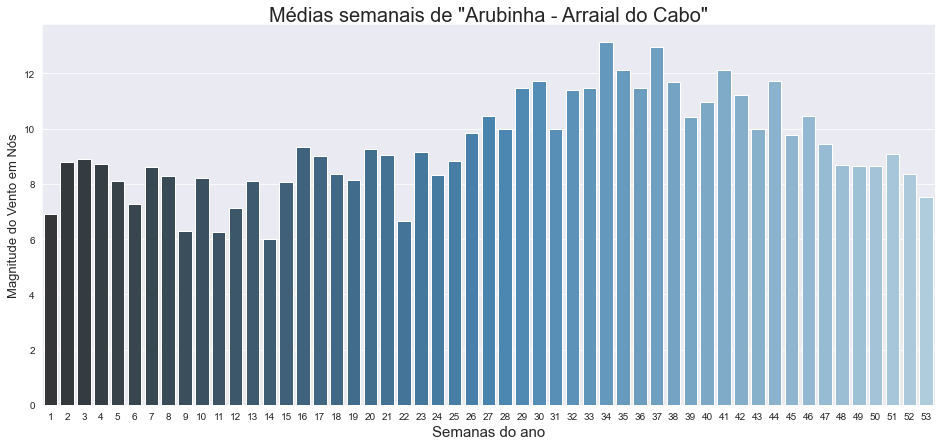

In [163]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,7))

sns.set_style('darkgrid')
sns.barplot(x = semana['week'].values, y = semana.values * 1.944, orient='v', palette = 'Blues_d')

ax.set_title('Médias semanais de "Arubinha - Arraial do Cabo"', size = 20, pad = 3)
ax.set_xlabel('Semanas do ano', fontdict={'fontsize': 15})
ax.set_ylabel('Magnitude do Vento em Nós', fontdict={'fontsize': 13})

Text(0, 0.5, 'Magnitude do Vento em Nós')

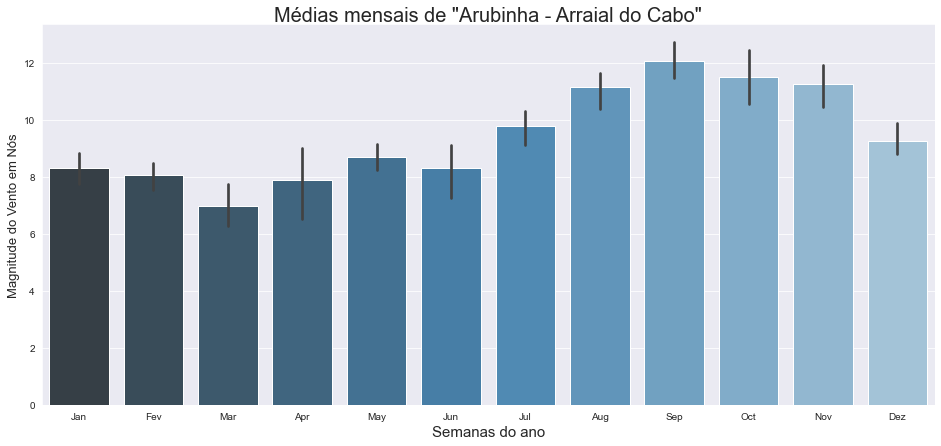

In [165]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,7))

sns.set_style('darkgrid')
sns.barplot(x = semanaIndex, y = semana.values * 1.944, orient='v', palette = 'Blues_d')

ax.set_title('Médias mensais de "Arubinha - Arraial do Cabo"', size = 20, pad = 3)
ax.set_xlabel('Semanas do ano', fontdict={'fontsize': 15})
ax.set_ylabel('Magnitude do Vento em Nós', fontdict={'fontsize': 13})

# Arubinha analysis - 975 hPa

In [173]:
BarData = xr.open_dataset("D:/_Gabriel/Estudo/UFF/Bloqueios_Atmosfericos/Climatologias/nc/975hPa_79_20.nc")
dataU = BarData.u.isel(expver=0).sel(latitude=-22.75).sel(longitude=-42.25).sel(time=slice('1979-01-01','2020-01-01'))
dataV = BarData.v.isel(expver=0).sel(latitude=-22.75).sel(longitude=-42.25).sel(time=slice('1979-01-01','2020-01-01'))

In [174]:
dataU

<xarray.DataArray 'u' (time: 493)>
array([-0.391924, -3.31659 , -0.175303, ..., -2.574973, -2.439788, -0.337633],
      dtype=float32)
Coordinates:
    longitude  float32 -42.25
    latitude   float32 -22.75
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-01-01
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

In [175]:
magBar = ((dataU)** 2 + (dataV)** 2) ** 0.5

In [176]:
def barplot(periodo):
    
    magMeans = magBar.sel(time=slice(periodo[0],periodo[1])).groupby('time.month').mean()
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,7))

    sns.set_style('darkgrid')
    sns.barplot(x = magMeans.month.values, y = magMeans.values * 1.944, orient='v', palette = 'Blues_d')

    ax.set_title('Médias mensais de "Arubinha - Arraial do Cabo"', size = 20, pad = 3)
    ax.set_xlabel('Período analisado: '+ periodo[0] + ' até '+ periodo[1], fontdict={'fontsize': 15})
    ax.set_ylabel('Magnitude do Vento em Nós', fontdict={'fontsize': 13})

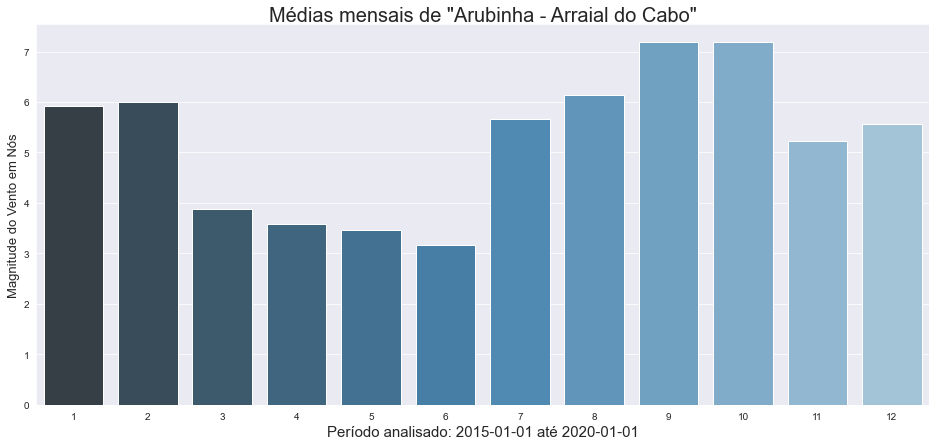

In [177]:
barplot(['2015-01-01','2020-01-01'])

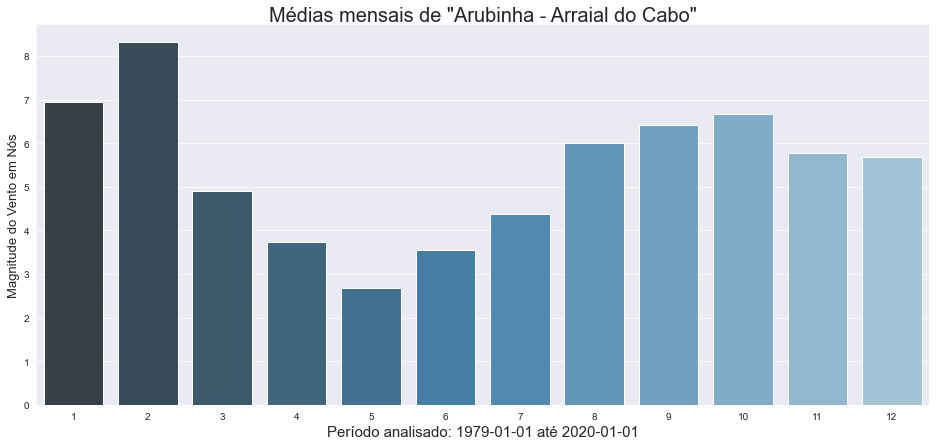

In [178]:
barplot(['1979-01-01','2020-01-01'])

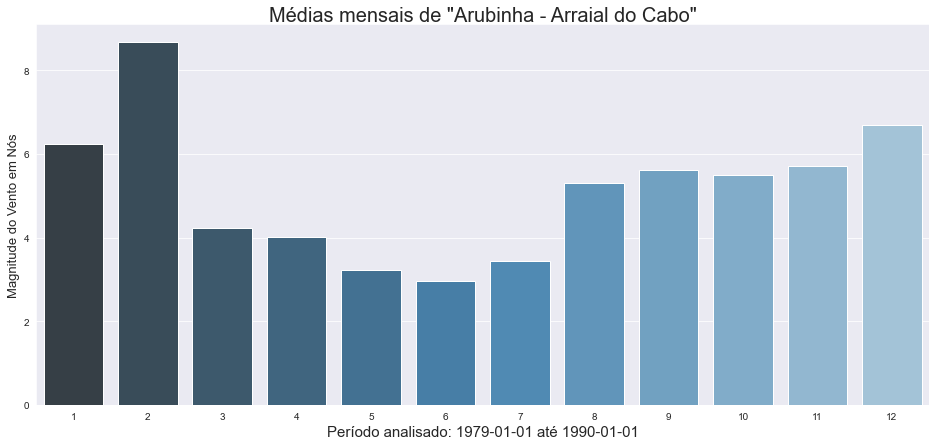

In [179]:
barplot(['1979-01-01','1990-01-01'])

In [180]:
magBar

<xarray.DataArray (time: 493)>
array([0.91812176, 4.644504  , 0.18094422, 1.0167453 , 0.4303732 ,
       1.0241748 , 1.9986962 , 2.7449021 , 3.8782978 , 3.5684435 ,
       1.8316525 , 3.3762803 , 1.8852153 , 4.8260713 , 5.4043803 ,
       2.091027  , 1.8618747 , 1.5676206 , 0.6505299 , 3.471619  ,
       1.2588515 , 3.5492074 , 3.548065  , 3.8022416 , 2.8774114 ,
       6.1393075 , 1.4115677 , 1.669251  , 3.297047  , 2.8194866 ,
       1.1740049 , 2.1981335 , 2.6883266 , 2.0323184 , 0.9892854 ,
       2.3136144 , 3.0971606 , 7.0823307 , 1.6790717 , 1.2951611 ,
       2.1587238 , 2.416713  , 2.5751271 , 3.3274736 , 3.240493  ,
       2.8052084 , 3.005815  , 4.0066967 , 3.6885357 , 5.8862715 ,
       1.4063933 , 2.447477  , 2.058009  , 0.84222156, 1.9150115 ,
       1.2459257 , 3.884292  , 3.8677814 , 4.092008  , 3.3834136 ,
       3.2836292 , 6.010999  , 1.4218941 , 3.7031214 , 2.5954578 ,
       1.086273  , 2.1471856 , 2.4655838 , 1.8558258 , 2.6600173 ,
       2.715043  , 2.4616518 , 1.657817  , 2.9967453 , 2.6117084 ,
       3.9562225 , 1.4271723 , 1.0696293 , 3.4989698 , 3.8380687 ,
       3.545129  , 2.4380212 , 4.9515657 , 3.5610218 , 4.3706355 ,
       3.310433  , 3.1910734 , 2.142383  , 2.8934517 , 2.7460086 ,
       0.76439637, 2.2803895 , 3.9665563 , 2.702472  , 4.4435453 ,
       2.8774767 , 2.6346726 , 3.8410745 , 1.0841517 , 1.3825132 ,
       0.3817784 , 0.73141265, 3.0675356 , 0.52902883, 2.07445   ,
       2.0848174 , 3.1115172 , 2.8795023 , 3.393675  , 2.1193314 ,
       2.8126185 , 1.3403726 , 0.62599325, 0.8380145 , 1.3194416 ,
       4.9014173 , 4.5421553 , 3.2801864 , 1.8098773 , 3.135829  ,
       5.389104  , 2.202149  , 2.673371  , 1.6247252 , 0.5605353 ,
       1.6743435 , 0.36543775, 3.0055857 , 0.78376216, 2.1616218 ,
       1.8278012 , 6.023829  , 5.3265367 , 2.5963945 , 4.099975  ,
       3.3086271 , 1.820367  , 2.188049  , 0.29670078, 2.883718  ,
       2.4922097 , 6.0317664 , 2.634641  , 3.2674541 , 2.4736288 ,
       2.8391032 , 4.008131  , 2.3167853 , 3.2887034 , 2.8553598 ,
       4.3313923 , 5.024231  , 2.6281796 , 5.45158   , 2.063436  ,
       1.7962108 , 4.5662966 , 7.138704  , 6.6795406 , 0.52350795,
       1.0993804 , 3.7292328 , 2.38571   , 1.6894684 , 4.050647  ,
       3.4375215 , 2.5515246 , 2.4072204 , 3.2239764 , 5.535122  ,
       1.4559994 , 1.6475998 , 1.3429673 , 2.1937237 , 1.7919561 ,
       1.1168284 , 1.5665646 , 4.617767  , 3.898804  , 2.8164685 ,
       2.257556  , 6.120249  , 2.253925  , 2.7716157 , 2.1525624 ,
       0.9120185 , 2.9463084 , 1.2469264 , 5.1310496 , 4.216696  ,
       2.0350106 , 3.2884939 , 2.6620631 , 2.315216  , 2.2900743 ,
       1.8782402 , 0.30733964, 1.7291365 , 5.156281  , 3.4462636 ,
       3.0896497 , 2.3271742 , 2.7450073 , 1.7180094 , 4.2488384 ,
       2.5806675 , 2.2866855 , 2.5815053 , 0.4107702 , 0.99323756,
       0.92918134, 4.111425  , 3.6988642 , 2.629442  , 3.882286  ,
       3.1033225 , 4.700039  , 6.719159  , 2.4412453 , 1.7856208 ,
       1.3309227 , 0.807102  , 2.6192827 , 3.4664502 , 0.89330345,
       2.713524  , 2.2999768 , 3.5970876 , 3.2026827 , 2.2445836 ,
       3.209322  , 2.0050666 , 0.26176864, 1.761573  , 1.059496  ,
       2.9124389 , 3.7980566 , 2.8742642 , 3.3723142 , 3.4292245 ,
       2.9088185 , 5.69057   , 1.3656796 , 1.833307  , 0.90005004,
       1.2402351 , 2.5598834 , 3.3276591 , 2.7529404 , 4.0175166 ,
       2.7925804 , 4.0146527 , 4.5969605 , 2.8194046 , 2.020942  ,
       1.4703178 , 0.7901074 , 2.6128511 , 1.5944974 , 2.1355174 ,
       4.4868097 , 3.8537664 , 4.611314  , 3.1618843 , 5.1919026 ,
       4.406733  , 3.773735  , 2.4276497 , 1.1064894 , 2.312719  ,
       2.5484476 , 7.8318105 , 3.9886076 , 5.771446  , 2.380681  ,
       3.3375278 , 2.5527823 , 2.629224  , 4.9058385 , 2.7702658 ,
       1.08006   , 2.8322449 , 1.6914034 , 5.7427135 , 4.196866  ,
       3.3996685 , 2.0430956 , 2.010055  , 1.5542744 , 6.9199824 ,
       1.7558392 , 1.856556  , 0.92236847, 0.5554128 , 2.5374806 ,
       1.8974316

In [187]:
def lines(data, periodo):
    
    magn = data
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(26,7))
        
    sns.set_style('darkgrid')
    ax.plot(magn.time.values, magn.values * 1.944)

    ax.set_title('Comportamento da magnitude em "Arubinha - Arraial do Cabo"', size = 20, pad = 3)
    ax.set_xlabel('Período analisado: '+ periodo[0] + ' até '+ periodo[1], fontdict={'fontsize': 15})
    ax.set_ylabel('Magnitude do Vento em Nós', fontdict={'fontsize': 13})

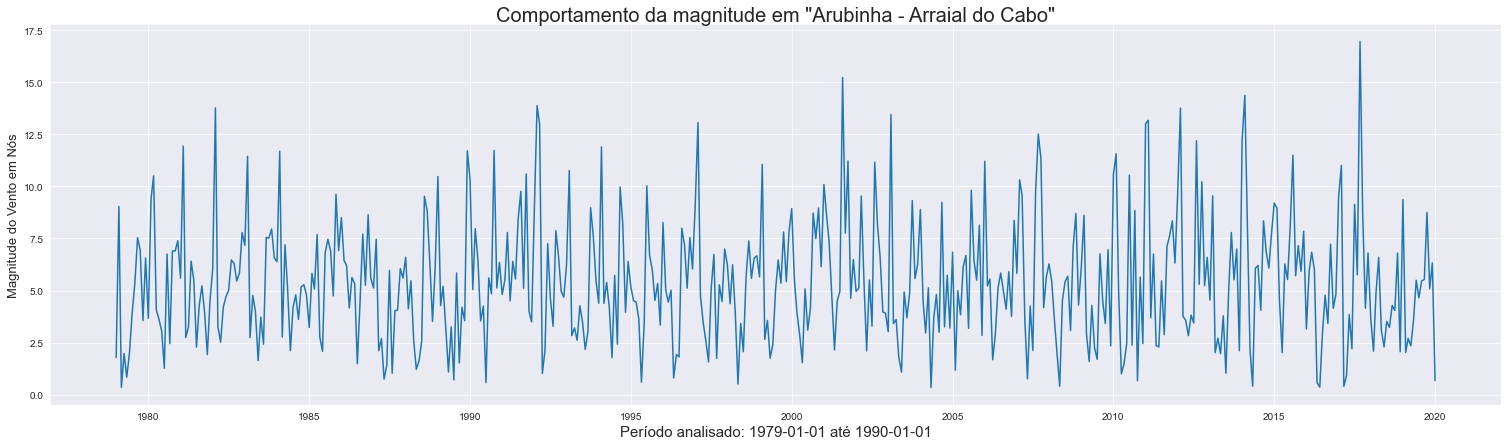

In [188]:
lines(magBar, ['1979-01-01','1990-01-01'])